In [30]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [45]:
# Define the vector of input samples as x, with 20 values sampled from a uniform distribution
# between 0 and 1
x = np.random.uniform(-1, 1, 20)
x = x.reshape(4,5)
print(x.shape)
print(x)

(4, 5)
[[-0.76967428  0.10743343 -0.52470126 -0.95367504 -0.37372518]
 [ 0.92284446  0.7938616  -0.23123951  0.84289171  0.43431709]
 [ 0.07581428  0.22965707 -0.96225666 -0.1324575   0.3754344 ]
 [ 0.41601223  0.75397621  0.4083928   0.78495889 -0.09921916]]


In [55]:
# Generate the target values y from x with small gaussian noise so the estimation won't
# be perfect.
y = np.random.uniform(-1,1,4)

In [56]:
print(y)

[-0.26930973  0.78210829  0.34423293  0.90759027]


In [57]:
print(x.shape)
print(y.shape)

(4, 5)
(4,)


In [ ]:
x = x - np.min(x)

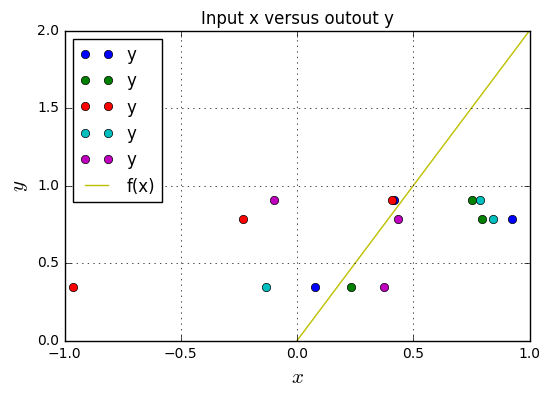

In [58]:
plt.plot(x, y, 'o', label='y')
plt.plot([0, 1], [f(0), f(1)], '-', label='f(x)' )
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)
plt.ylim([0,2])
plt.title("Input x versus outout y")
plt.grid()
plt.legend(loc=2)
plt.show()

In [34]:
#Build model

num_epochs = 1000

#Initialize weights

syn0 = 2*np.random.random((3,4)) -1
syn1 = 2*np.random.random((4,1)) -1
print syn0
print syn1

[[-0.85819715  0.66799157  0.80055734 -0.66097872]
 [-0.01884241  0.61544179  0.32468491  0.84828279]
 [ 0.91604957 -0.02373388 -0.45391803  0.97260126]]
[[ 0.66081101]
 [ 0.10368761]
 [ 0.77958919]
 [ 0.29438816]]


In [35]:
def nonlinear(x, deriv=False):
    if deriv == True:
        return x*(1-x)
    else:
        return 1/ (1 + np.exp(-x))

In [36]:
#Step -3 Train model using 3 layer neural network
for j in range(num_epochs):
    l0 = x #Input layer 
    l1 = nonlinear(np.dot(l0, syn0))  #First hidden layer
    l2 = nonlinear(np.dot(l1, syn1)) # Output layer
    
    #How much did we miss the target value
    
    l2_error = y - l2
    
    if j % 10 == 0:
        print("Error:" + str(np.mean(np.abs(l2_error))))
        
    #In what direction is the target value
    l2_delta = l2_error*nonlinear(l2, deriv=True)
    
    #how much did l1 value contributed to l2 error
    l1_error = l2_delta.dot(syn1.T)
    
    l1_delta = l1_error*nonlinear(l1, deriv=True)
    
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)

ValueError: shapes (20,) and (3,4) not aligned: 20 (dim 0) != 3 (dim 0)

In [22]:
print(syn0.shape)
print(syn1.shape)

(3, 4)
(4, 1)


ValueError: x and y can be no greater than 2-D

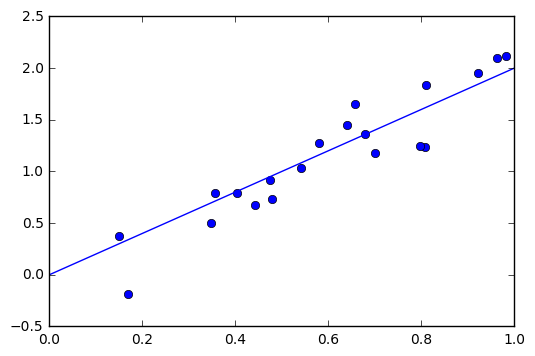

In [20]:
# Plot the fitted line agains the target line
# Plot the target t versus the input x
plt.plot(x, y, 'o', label='t')
# Plot the initial line
plt.plot([0, 1], [f(0), f(1)], 'b-', label='f(x)')
# plot the fitted line
plt.plot([0, 1], [0*syn1, 1*syn1], 'r-', label='fitted line')
plt.xlabel('input x')
plt.ylabel('target y')
plt.ylim([0,2])
plt.title('input vs. target')
plt.grid()
plt.legend(loc=2)
plt.show()